In [2]:
PYTHON_PATHS = [".."]
import sys
for path in PYTHON_PATHS:
    if path not in sys.path:
        sys.path.append(path)
from unsupkeypoints.features.super_point_frontend import SuperPointFrontend

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
import os.path
import cv2

# Load model

In [4]:
WEIGHT_PATH = "/home/mikhail/Downloads/superpoint_v1.pth"
SUPER_POINT = SuperPointFrontend(weights_path=WEIGHT_PATH,
                                 nms_dist=4,
                                 conf_thresh=0.015,
                                 nn_thresh=0.7,
                                 cuda=True)

# Load image

In [5]:
IMAGE_PATH = "/home/mikhail/research/lie-pose-net/data/7scenes/fire/seq-01/frame-000001.color.png"

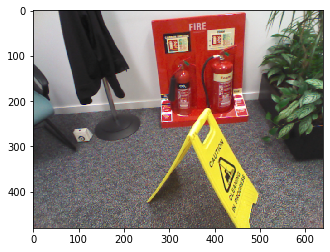

In [7]:
INPUT_IMAGE = np.asarray(Image.open(IMAGE_PATH))
plt.imshow(INPUT_IMAGE)

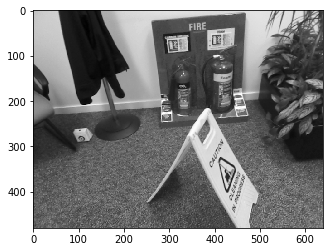

In [12]:
GRAY_IMAGE = cv2.cvtColor(INPUT_IMAGE, cv2.COLOR_RGB2GRAY)
GRAY_IMAGE = (GRAY_IMAGE / 255.).astype(np.float32)
plt.imshow(GRAY_IMAGE, cmap="gray")

# Extract features

In [28]:
keypoints, descriptors, heatmap = SUPER_POINT.run(GRAY_IMAGE)
keypoints = keypoints[:2, :].T
descriptors = descriptors.T

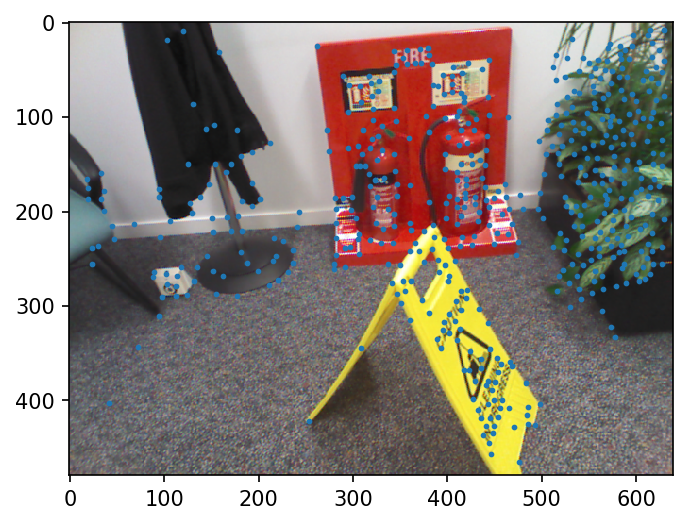

In [29]:
plt.figure(dpi=150)
plt.imshow(INPUT_IMAGE)
# mask = scores > 15
plt.scatter(keypoints[:, 0], keypoints[:, 1], s=3)

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=3).fit(descriptors)
pca_descriptors = pca.transform(descriptors)

In [35]:
max_c = np.max(pca_descriptors)
min_c = np.min(pca_descriptors)
colors = np.clip((pca_descriptors - min_c) / (max_c - min_c), 0, 1)

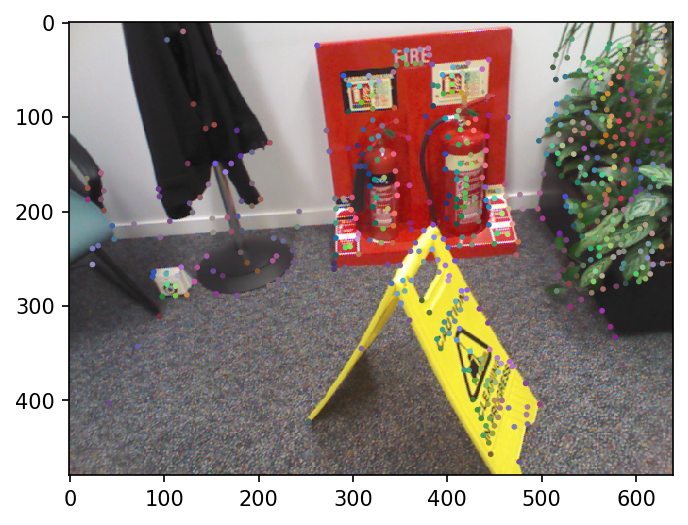

In [36]:
plt.figure(dpi=150)
plt.imshow(INPUT_IMAGE)
plt.scatter(keypoints[:, 0], keypoints[:, 1], s=3, c=colors)